In [ ]:
!pip install scikit_plot
import scikitplot as skplt

In [ ]:
# install pytorch, and torchnet
# get cuda version to determine correct pytorch installation
! nvcc --version

# use the command generated by pytorch.org to download pytorch
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# install torchnet
! pip install git+https://github.com/pytorch/tnt.git@master

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 24kB/s 
     |████████████████████████████████| 6.6MB 58.1MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
  Cloning https://github.com/pytorch/tnt.git (to revision master) to /tmp/pip-req-build-c1yymgi1
  Running command git clone -q https://github.com/pytorch/tnt.git /tmp/pip-req-build-c1yymgi1
     |████████████████████████████████| 686kB 8.1MB/s 
     |████████████████████████████████| 204kB 15.1MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.5.1-cp36-non

In [ ]:
# download and install the project files

!git clone https://github.com/MTynes/prototypical-networks.git protonets

%cd /content/protonets
import os, sys
sys.path.append(os.getcwd())
!python setup.py install

Cloning into 'protonets'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 193 (delta 20), reused 40 (delta 15), pack-reused 134
Receiving objects: 100% (193/193), 220.50 KiB | 1.10 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/protonets
running install
running bdist_egg
running egg_info
creating protonets.egg-info
writing protonets.egg-info/PKG-INFO
writing dependency_links to protonets.egg-info/dependency_links.txt
writing requirements to protonets.egg-info/requires.txt
writing top-level names to protonets.egg-info/top_level.txt
writing manifest file 'protonets.egg-info/SOURCES.txt'
writing manifest file 'protonets.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/protonets
copying protonets/__init__.py -> build/lib/protonets
copying protonets/engine.py -

In [ ]:
# Some of the original files have been updated

## Changes to omniglot.py:
# 1. line 41  -  Update the path 
#     img_dir_new = '/content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/'
#     image_dir = os.path.join(img_dir_new, alphabet, character)
# 2. line 116 to 117 -  replace existing code with the following lines:
#      data_path = '/content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml'
#      with open(os.path.join(data_path, "{:s}.txt".format(split)), 'r') as f:
# 3. line 27 (or thereabout) - change the transform value so that channels=4:
#     d[key] = 1.0 - torch.from_numpy(np.array(d[key], np.float32, copy=False)).transpose(0, 1).contiguous().view(1, d[key].size[0], d[key].size[1])
#


# Changes to train.py:
# 1. line 38  - set channels to 4
# 2. line 57 -  set train.patience to 1000 

In the code below, training, validation and testing groups are created and written to .txt files.

In omniglot.py or custom_dataset.py, these files are read at around line 118 with var data_path.
The structure of the directory is by patient group (hc or sz) and then by participant ID.
For example, for schizophrenic patient number 09, file number 31 is saved at:
<a href="javascript:void(0)" style="color:black !important;text-decoration: None">eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/sz/sz9/sz9_30.png</a> 

<br><br>The file names generated below also contain a rotation command appended at the end. Rotations are read by load_class_images() in custom_dataset.py and omniglot.py 
<br>The code extracts files from the spectrogram directory where the files are saved by subject.
<br>Subjects for each group (train, validation, test) are selected and saved to .txt files
<br>As an example, for the EEG_Sz spectrograms dataset, some entries in the test.txt file are 
<a href='javascript:void(0)' style="display: inline; text-decoration: none; color: black !important;">
<br> hc/hc11/rot000
<br> hc/hc11/rot090
<br> hc/hc11/rot180
<br> hc/hc11/rot270
<br> sz/sz5/rot000
<br> sz/sz5/rot090
<br> sz/sz5/rot180
<br> sz/sz5/rot270
</a>

<br><br>
The project was already equipped with a command line interface. Here, it is extended to include options for setting the directory of the input images and for the label text files.
<br>Commands of interest when customizing the project include
<br>--data.data_path
<br>--data.labels_path
<br>--train.patience
<br>--train.learning_rate
<br>--model.x_dim

The full list of options for the custom dataset version of the project can be viewed  (with descriptions) using 
<br>
> <a href='javascript:void(0)'>! python protonets/scripts/train/few_shot/run_train_custom_dataset.py --help</span>


In [ ]:
! python scripts/train/few_shot/run_train_custom_dataset.py --help

['scripts/train/few_shot/run_train_custom_dataset.py', '--help']
usage: run_train_custom_dataset.py [-h] [--data.dataset DS]
                                   [--data.data_path DSPATH]
                                   [--data.labels_path LABELSPATH]
                                   [--data.split SP] [--data.way WAY]
                                   [--data.shot SHOT] [--data.query QUERY]
                                   [--data.test_way TESTWAY]
                                   [--data.test_shot TESTSHOT]
                                   [--data.test_query TESTQUERY]
                                   [--data.train_episodes NTRAIN]
                                   [--data.test_episodes NTEST]
                                   [--data.trainval] [--data.sequential]
                                   [--data.cuda]
                                   [--model.model_name MODELNAME]
                                   [--model.x_dim XDIM]
                                   [--m

In [ ]:
# Get the small version of the dataset. It's about 42MB in size unzipped
import gdown
import os

#Get the EEG spectrograms zip file and unzip it
images_directory = '/content/eeg_sz_spectrograms'
gdown.download('https://drive.google.com/uc?id=1WZ1yIFE2bng0McnY_4UBJHqTttsXTTNX', '{}.zip'.format(images_directory), quiet=False) 
!unzip -qq {images_directory}.zip -d {images_directory}

dl_link = '/content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/'
!mv "{dl_link}/hc" {images_directory}
!mv "{dl_link}/sz" {images_directory}


Downloading...
From: https://drive.google.com/uc?id=1WZ1yIFE2bng0McnY_4UBJHqTttsXTTNX
To: /content/eeg_sz_spectrograms.zip
44.2MB [00:00, 129MB/s] 


Archive:  /content/eeg_sz_spectrograms.zip
   creating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/
   creating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/
  inflating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/hc0_0.png  
  inflating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/hc0_1.png  
  inflating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/hc0_10.png  
  inflating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/hc0_11.png  
  inflating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/hc0_12.png  
  inflating: /content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/hc/hc0/hc0_13.png  
  inflating: /content/eeg_sz_spectrograms/g

In [ ]:
# The training, validation and testing groups are created using different .txt files.
# The code below splits the participants and saves the groups to the respective files.
# In omniglot.py, these files are read at around line 123.
# The structure of the directory is by patient group (hc or sz) and then by participant.
# File names generated below also contain a rotation command appended at the end.

# Extract files from an eeg_sz spectrogram directory where the files are saved by subject

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


rand_seed = 1
# List of raw patient file IDs that should be skipped based on categorization as outliers
ignore_list = ['h34' 'h35' 'h36' 'h37' 'h38' 's34' 's35' 's36' 's37' 's38']

hc_subject_ids = ['hc' + str(i) for i in range(38) if "h{:02}".format(i) not in ignore_list] 
sz_subject_ids = ['sz' + str(i) for i in range(38) if "s{:02}".format(i) not in ignore_list] 
all_subject_ids = np.concatenate([hc_subject_ids, sz_subject_ids], axis=0)


train_hc, validate_hc = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)
train_sz, validate_sz = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)
train_hc, test_hc = train_test_split(train_hc, test_size=0.25, random_state=rand_seed)
train_sz, test_sz = train_test_split(train_sz, test_size=0.25, random_state=rand_seed)
iter_train = np.concatenate([train_hc, train_sz])
iter_validate = np.concatenate([validate_hc, validate_sz])  # unused
iter_test = np.concatenate([test_hc, test_sz]) 


test_ids = np.concatenate([test_hc, test_sz])
train_ids = np.concatenate([train_hc, train_sz])
validate_ids = np.concatenate([validate_hc, validate_sz])
ids = { 'test': test_ids}
  

print('\nSubjects assigned to groups using sklearn.model_selection.train_test_split')
print('Training group: ', ", ".join(train_ids), "\n")
print('Validation group: ', ", ".join(validate_ids), "\n")
print('Test group: ', ", ".join(test_ids), "\n")

from shutil import copyfile
import pandas as pd
import os 

test_images_output_directory =  images_directory #'all_images_' + images_directory.split('/')[-2]

if not os.path.exists(test_images_output_directory):
    os.mkdir(test_images_output_directory)
    
def gen_csv_and_copy_sz_files(image_dir, img_output_dir, subdir, 
                              participant_ids, output_name, add_rotation=True ):
    subdir_data = []
    for group in ['hc', 'sz']: #['Healthy_Control', 'Sz_Patient']:
        for pid in os.listdir(image_dir + '/' + group): # by participant IDs
            if pid in participant_ids:
              if add_rotation:
                for rotation in ['rot000', 'rot090', 'rot180', 'rot270']: #os.listdir(image_dir + '/' + group + '/' + pid):
                  #file_data = {'filename': file, 'label': group}
                  file_data = {'filename': group + '/' + pid + '/' + rotation} #file.replace('.png', '')}
                  subdir_data.append(file_data)
              else:
                #for rotation in ['rot000', 'rot090', 'rot180', 'rot270']: #os.listdir(image_dir + '/' + group + '/' + pid):
                #file_data = {'filename': file, 'label': group}
                #file_data = {'filename': group + '/' + pid + '/' + rotation} #file.replace('.png', '')}
                file_data = {'filename': group + '/' + pid} #file.replace('.png', '')}
                subdir_data.append(file_data)
                
                #copyfile(image_dir + '/' + group + '/' + pid + '/' + file, img_output_dir + '/' + file )
    pd.DataFrame(subdir_data).to_csv(test_images_output_directory + '/' + output_name, index=False, header=False)
    return pd.DataFrame(subdir_data)




train_df = gen_csv_and_copy_sz_files(image_dir=images_directory, 
                                img_output_dir=test_images_output_directory,
                                subdir='train', 
                                participant_ids=train_ids, 
                                output_name= 'train.txt')
validate_df = gen_csv_and_copy_sz_files(image_dir=images_directory, 
                                img_output_dir=test_images_output_directory,
                                subdir='validate', 
                                participant_ids=validate_ids, 
                                output_name= 'val.txt')

train_val_df = gen_csv_and_copy_sz_files(image_dir=images_directory, 
                                img_output_dir=test_images_output_directory,
                                subdir='trai_val', 
                                participant_ids=np.concatenate([train_ids, validate_ids]),#, 
                                output_name= 'train_val.txt')

test_df = gen_csv_and_copy_sz_files(image_dir=images_directory, 
                                img_output_dir=test_images_output_directory,
                                subdir='test', 
                                participant_ids=test_ids, 
                                output_name= 'test.txt')




Subjects assigned to groups using sklearn.model_selection.train_test_split
Training group:  hc5, hc0, hc15, hc28, hc30, hc11, hc31, hc7, hc32, hc26, hc8, hc24, hc6, hc19, hc18, hc37, hc12, hc14, hc4, hc23, hc33, hc34, sz5, sz0, sz15, sz28, sz30, sz11, sz31, sz7, sz32, sz26, sz8, sz24, sz6, sz19, sz18, sz37, sz12, sz14, sz4, sz23, sz33, sz34 

Validation group:  hc2, hc29, hc3, hc22, hc25, hc27, hc21, hc35, sz2, sz29, sz3, sz22, sz25, sz27, sz21, sz35 

Test group:  hc13, hc16, hc10, hc36, hc20, hc1, hc9, hc17, sz13, sz16, sz10, sz36, sz20, sz1, sz9, sz17 



In [ ]:
#split the test file into hc_test and sz_test 
# for prediction vs ground truth evaluation

test_df = pd.read_csv(test_images_output_directory + '/test.txt', sep='\n', names=['file_name'])
test_df[test_df['file_name'].str.startswith('hc')].to_csv(test_images_output_directory + '/hc_test.txt', header=False, index=False)
test_df[test_df['file_name'].str.startswith('sz')].to_csv(test_images_output_directory + '/sz_test.txt', header=False, index=False)


In [ ]:
"""import zipfile

with zipfile.ZipFile('/content/protonets.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/protonets')"""

"import zipfile\n\nwith zipfile.ZipFile('/content/protonets.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/protonets')"

In [ ]:
"""#!/usr/bin/env python
import os
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

if __name__ == '__main__':
    zipf = zipfile.ZipFile('/content/protonets_updated.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('/content/protonets', zipf)
    zipf.close()"""

"#!/usr/bin/env python\nimport os\nimport zipfile\n\ndef zipdir(path, ziph):\n    # ziph is zipfile handle\n    for root, dirs, files in os.walk(path):\n        for file in files:\n            ziph.write(os.path.join(root, file))\n\nif __name__ == '__main__':\n    zipf = zipfile.ZipFile('/content/protonets_updated.zip', 'w', zipfile.ZIP_DEFLATED)\n    zipdir('/content/protonets', zipf)\n    zipf.close()"

In [ ]:
%cd /content/protonets

#--train.learning_rate 0.0001


import timeit
import math
import tensorflow as tf

start = timeit.default_timer()

lr = 0.0001
epochs = 10000
#if GPU is enabled use --data.cuda
if tf.test.is_gpu_available() and tf.test.is_built_with_cuda():
  ! python scripts/train/few_shot/run_train_custom_dataset.py --data.data_path {images_directory} --data.labels_path {images_directory} --train.learning_rate {lr} --train.epochs {epochs} --data.cuda 
# for environments without gpu, run:
else:
  ! python scripts/train/few_shot/run_train_custom_dataset.py --data.data_path {images_directory} --data.labels_path {images_directory} --train.learning_rate {lr} --train.epochs {epochs}

stop = timeit.default_timer()
hrs = math.floor((stop - start)/60/60)
minutes =((stop - start)/60) -hrs*60 
print('\n\nExecution time: {} hrs {} minutes'.format(hrs, minutes ))



/content/protonets
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
['scripts/train/few_shot/run_train_custom_dataset.py', '--data.data_path', '/content/eeg_sz_spectrograms', '--data.labels_path', '/content/eeg_sz_spectrograms', '--train.learning_rate', '0.0001', '--train.epochs', '10000', '--data.cuda']
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 1 train: 100% 100/100 [00:10<00:00,  9.58it/s]
Epoch 1 valid: 100% 100/100 [00:02<00:00, 42.49it/s]
Epoch

In [ ]:
import matplotlib.pyplot as plt
import itertools

# modified from main.py https://github.com/zhangrong1722/CheXNet-Pytorch

def plt_roc(test_y, probas_y, plot_micro=False, plot_macro=False):
    assert isinstance(test_y, list) and isinstance(probas_y, list), 'the type of input must be list'
    skplt.metrics.plot_roc(test_y, probas_y, plot_micro=plot_micro, plot_macro=plot_macro)
    plt.savefig('roc_auc_curve.png')
    plt.show()
    plt.close()


###########################################
# Define confusion matrix and ROC visualization functions
# from https://colab.research.google.com/drive/1ISfhxFDntfOos7cOeT7swduSqzLEqyFn#scrollTo=UiKRYOWPfhJs

def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          cv=10):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.locator_params(nbins=2)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
pred_df = pd.read_csv('predictions_and_classes.csv')



Confusion matrix, without normalization


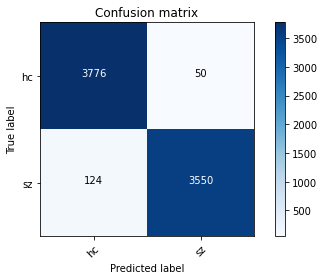

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(pred_df['prediction'], pred_df['label'])
plot_confusion_matrix(confusion,
                      classes=['hc', 'sz'],
                      title='Confusion matrix')


In [ ]:
# for the ROC, group all samples and use the mean accuracy as the probability
from IPython.display import display
#pred_df.replace(-1, 0, inplace=True)

#roc_df = pred_df.groupby(['full_class_name']).mean().reset_index()
#display(roc_df)
#roc_mean_accs = [[s, s] for s in roc_df['prediction']]
#plt_roc(list(roc_df['label']), list(roc_mean_accs))


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

test_labels =  pred_df['label']
test_predictions = pred_df['prediction']
auc = roc_auc_score(test_labels, test_predictions)
print('AUC score for test set: ', auc)


f1_macro = f1_score(test_labels, test_predictions, average='macro')
f1_micro = f1_score(test_labels, test_predictions, average='micro')

print('F1 score (average=macro): {}     F1 score (average=micro): {}'.format(f1_macro, f1_micro))


AUC score for test set:  0.9771581196581197
F1 score (average=macro): 0.9767789148418571     F1 score (average=micro): 0.9768


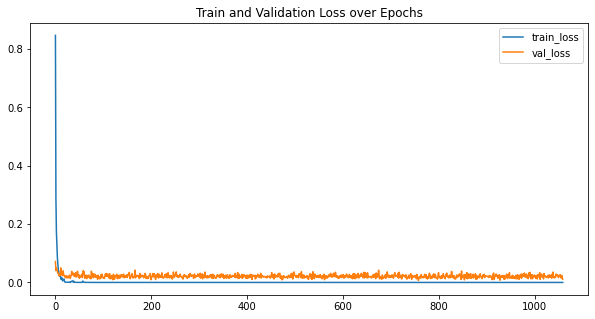

In [ ]:
metrics = pd.read_csv('model_metrics.csv')
metrics.head()

metrics[['train_loss', 'val_loss']].plot(figsize=(10,5), title='Train and Validation Loss over Epochs')

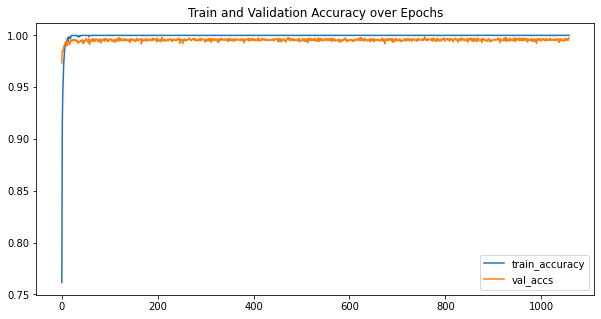

In [ ]:
metrics[['train_accuracy', 'val_accs']].plot(figsize=(10,5), title='Train and Validation Accuracy over Epochs')